### This is for the Coursera Capstone Project

In [39]:
import pandas as pd
import numpy as np

In [40]:
print('Hello, Capstone Project Course!')

Hello, Capstone Project Course!


## Data
The data I used was the Data Collision information for the city of Seattle, from 2004-2020. This data is pulled from the police reports of the incidents, and has many variables, such as the weather, location, how the car hit something, and if people such as pedestrians or cyclists were involved. The target label, severity, is split into two results “1” for property-only collisions and “2” for collisions with injuries. While the dataset is large, it is clear from the outset that many columns can be dropped. Columns like “INATTENTIONIND” and “EXCEPTRSNCODE” are full of null values. Columns like “STATUS” and “REPORTNO” are filled, but irrelevant to the severity of the crash. 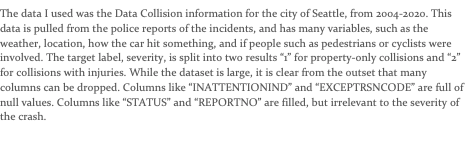

In [41]:
df_collide = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df_collide.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [43]:
df_collide.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [44]:
df_collide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [45]:
df_road = df_collide["ROADCOND"].value_counts()
df_road

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

We see quickly that Unknown is not helpful, and that values below Snow/Slush drop off so much as to be irrelevant to the process. Therefore, we will use the factors 'Dry', 'Wet', 'Ice', and 'Snow/Slush' as our variables. It also suggests that people are not as careful as they think when driving in these types of conditions.

In [76]:
df_collide = df_collide.replace("Standing Water","Wet")

df_road2 = df_collide[(df_collide["ROADCOND"]=="Dry")|(df_collide["ROADCOND"]=="Wet")|(df_collide["ROADCOND"]=="Ice")|(df_collide["ROADCOND"]=="Snow/Slush")]

df_road_count= df_road2["ROADCOND"].value_counts()
df_road_count

Dry           124510
Wet            47589
Ice             1209
Snow/Slush      1004
Name: ROADCOND, dtype: int64

In [47]:
df_weather = df_collide["WEATHER"].value_counts()
df_weather

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Just as before, collisions drop off sharply after unknown. Therefore, we will be using 'Clear', 'Raining', and 'Overcast'.

In [75]:
df_collide = df_collide.replace("Sleet/Hail/Freezing Rain","Snowing")

df_weather2 = df_collide[(df_collide["WEATHER"]=="Clear")|(df_collide["WEATHER"]=="Raining")|(df_collide["WEATHER"]=="Overcast")|(df_collide["WEATHER"]=="Snowing")]

df_weather_count= df_weather2["WEATHER"].value_counts()
df_weather_count

Clear       111135
Raining      33145
Overcast     27714
Snowing       1020
Name: WEATHER, dtype: int64

In [48]:
df_light = df_collide["LIGHTCOND"].value_counts()
df_light

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

While this data is useful, it is not particularlly applicable. Most people drive during the day, and sleep at night. In the US, most people have jobs that they drive to and from during the day. Many of these crashes may have happened during a regular commute in the winter, when the sun sets very early.

In [64]:
df_collide.corr()

,SEVERITYCODE,X,Y,INCKEY,COLDETKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
SEVERITYCODE,1.000000,0.010309,0.017737,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
X,0.010309,1.000000,-0.160262,0.010309,0.010300,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.001016,-0.001618,0.013586
Y,0.017737,-0.160262,1.000000,-0.027396,-0.027415,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,-0.006958,0.004618,0.009508
INCKEY,0.022065,0.010309,-0.027396,1.000000,0.999996,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.990571,0.019701,0.048179
COLDETKEY,0.022079,0.010300,-0.027415,0.999996,1.000000,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.990571,0.019586,0.048063
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.022065,0.022079,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,0.004226,0.104276,0.175093
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.061500,-0.061403,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,0.011784,-0.021383,-0.032258
PEDCOUNT,0.246338,0.011304,0.010178,0.024918,0.024914,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,0.021461,0.001810,0.565326
PEDCYLCOUNT,0.214218,-0.001752,0.026304,0.031342,0.031296,0.214218,-0.038809,-0.016920,1.000000,-0.253773,0.382521,0.034593,0.453657,0.109820
VEHCOUNT,-0.054686,-0.012168,0.017058,-0.107528,-0.107598,-0.054686,0.380523,-0.261285,-0.253773,1.000000,-0.365814,-0.023813,-0.122941,-0.200526


In [65]:
df_severe = df_collide["SEVERITYCODE"].value_counts()
df_severe

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [73]:
df_road2["SEVERITYCODE"].value_counts()

1    118023
2     56289
Name: SEVERITYCODE, dtype: int64

In [77]:
df_dry = df_road2[df_collide["ROADCOND"]=="Dry"]

df_wet = df_road2[df_collide["ROADCOND"]=="Wet"]

df_ice = df_road2[df_collide["ROADCOND"]=="Ice"]

df_snow = df_road2[df_collide["ROADCOND"]=="Snow/Slush"]

df_dry_counts = df_dry["SEVERITYCODE"].value_counts()

df_wet_counts = df_wet["SEVERITYCODE"].value_counts()

df_ice_counts = df_ice["SEVERITYCODE"].value_counts()

df_snow_counts = df_snow["SEVERITYCODE"].value_counts()

print("dry :\n",df_dry_counts)
print("wet :\n",df_wet_counts)
print("ice :\n",df_ice_counts)
print("snow :\n",df_snow_counts)

dry :
 1    84446
2    40064
Name: SEVERITYCODE, dtype: int64
wet :
 1    31804
2    15785
Name: SEVERITYCODE, dtype: int64
ice :
 1    936
2    273
Name: SEVERITYCODE, dtype: int64
snow :
 1    837
2    167
Name: SEVERITYCODE, dtype: int64


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [82]:
df_collide[['SEVERITYCODE','PEDCOUNT','PERSONCOUNT']].corr()

,SEVERITYCODE,PEDCOUNT,PERSONCOUNT
SEVERITYCODE,1.000000,0.246338,0.130949
PEDCOUNT,0.246338,1.000000,-0.023464
PERSONCOUNT,0.130949,-0.023464,1.000000
